In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [0]:
(train,val),metadata=tfds.load("tf_flowers",as_supervised=True,with_info=True,split=["train[:80%]",'train[80%:]'])

Shuffling and writing examples to /root/tensorflow_datasets/tf_flowers/3.0.0.incompleteNSYPW0/tf_flowers-train.tfrecord


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.0. Subsequent calls will reuse this data.


In [0]:
classes=metadata.features['label'].names

In [0]:
class

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [0]:
def normalize(images,labels):
  images=tf.image.resize(images,(224,224))/255.0
  return(images,labels)

In [0]:
train_eg=metadata.splits['train'].num_examples*0.8

In [0]:
train=train.map(normalize)
val=val.map(normalize)

In [0]:
train=train.shuffle(int(train_eg)).batch(32)
val=val.batch(32)

In [0]:
Url="https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
layer1=hub.KerasLayer(Url,input_shape=(224,224,3))

In [0]:
layer1.trainable=False

In [0]:
model=tf.keras.Sequential([layer1,tf.keras.layers.Dense(5,activation=tf.nn.softmax)])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
h=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
92/92 [==============================] - 59s 636ms/step - loss: 0.7786 - accuracy: 0.7490 - val_loss: 0.4678 - val_accuracy: 0.8379
Epoch 2/20
92/92 [==============================] - 58s 632ms/step - loss: 0.3946 - accuracy: 0.8583 - val_loss: 0.3490 - val_accuracy: 0.8856
Epoch 3/20
92/92 [==============================] - 58s 629ms/step - loss: 0.3208 - accuracy: 0.8883 - val_loss: 0.3381 - val_accuracy: 0.8828
Epoch 4/20
92/92 [==============================] - 58s 626ms/step - loss: 0.2771 - accuracy: 0.9067 - val_loss: 0.3118 - val_accuracy: 0.8937
Epoch 5/20
92/92 [==============================] - 57s 624ms/step - loss: 0.2659 - accuracy: 0.9060 - val_loss: 0.3286 - val_accuracy: 0.8869
Epoch 6/20
92/92 [==============================] - 58s 625ms/step - loss: 0.2304 - accuracy: 0.9142 - val_loss: 0.3397 - val_accuracy: 0.8883
Epoch 7/20
92/92 [==============================] - 58s 628ms/step - loss: 0.2194 - accuracy: 0.9206 - val_loss: 0.2855 - val_accuracy: 0.9060

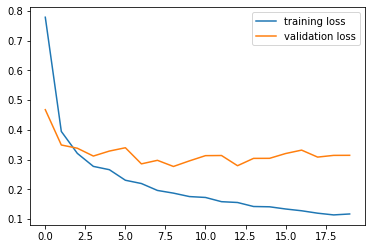

In [0]:
plt.plot(h.history['loss'],label="training loss")
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()

Text(0.5, 0, 'sunflowers')

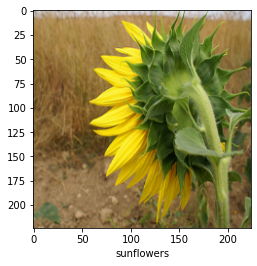

In [0]:
for(im,lbl) in train.take(25):
  prediction=(model.predict(im))
plt.imshow(im[21])
plt.xlabel(classes[np.argmax(prediction[21])])

In [0]:
classes[lbl[21].numpy()]

'sunflowers'